In [1]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
from mne.event import define_target_events
from scipy.stats import ttest_ind
from time import time
from mne.preprocessing import ICA
from mne.datasets import sample
from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

In [2]:
import scipy.io
rival = scipy.io.loadmat('/media/dian/D/data/Binocular_Rivalry/info/rival_ind.mat')
replay = scipy.io.loadmat('/media/dian/D/data/Binocular_Rivalry/info/replay_smooth_ind.mat')

In [3]:
emixed_BR = []; # list for BR condition
edominant_BR = [];
Lag1_BR = np.array([]);
Lag2_BR = np.array([]);

for ss in range(1,21):
    rival_sub = rival['rival_ind'][0][ss-1][0]
    # FOR BR CONDITION
    for sc in rival_sub:
    # looping variables
        #ss = 1
        #sc = 1
        sub  = 'S' + str(ss).zfill(2)
        scan = 'scan' + str(sc)
        # read file
        fname = '/media/dian/D/data/Binocular_Rivalry/MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.set'
        raw = mne.io.read_raw_eeglab(fname)
        raw.info['bads'] = ['ECG']
        #raw.save('MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.fif')

        # epoch
        event_id = {"S  3":1, "S  1":2, "S  2":2}
        events = mne.events_from_annotations(raw, event_id)[0]

        # separate events
        tmax1 = 0.2
        tmin1 = -1

        tmax2 = 0.2
        tmin2 = -1

        sfreq = raw.info["sfreq"] # sample rate = 250 Hz
        reference_id, target_id = 1, 2
        new_events1, lag1 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin1, tmax=tmax1, new_id=1)

        epochs_mixed = mne.Epochs(raw, events=new_events1, tmax=tmax1 , tmin=tmin1, baseline = None,
                            event_id={"S  3":1})

        reference_id, target_id = 2, 1
        new_events2, lag2 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin2, tmax=tmax2, new_id=2)

        epochs_dominant = mne.Epochs(raw, events=new_events2, tmax=tmax2 ,tmin=tmin2, baseline = None,
                            event_id={"S  1":2, "S  2":2})

        # store outputs
        emixed_BR.append(epochs_mixed)
        edominant_BR.append(epochs_dominant)
        Lag1_BR = np.append(Lag1_BR, lag1)
        Lag2_BR = np.append(Lag2_BR, lag2)

<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
78 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
85 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
71 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
85 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
65 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
94 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
67 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
93 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
68 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
84 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
66 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
78 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
22 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
35 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
39 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
22 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
31 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
33 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
74 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
46 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
41 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
17 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
18 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
47 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
21 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
36 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
8 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
35 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
1 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
34 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
23 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
33 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
48 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
28 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
25 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
36 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
23 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
53 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
33 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
39 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
47 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
18 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
46 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
48 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
36 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
41 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
33 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
28 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
35 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
14 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
13 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
32 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
77 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
46 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
80 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
78 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
67 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
23 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
28 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
83 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
36 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
67 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
61 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
27 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
34 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
94 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
126 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
75 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
111 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
78 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
108 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
61 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
88 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
79 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
93 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
67 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
28 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
61 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
69 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
8 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
63 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
4 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
68 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
41 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
72 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
61 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
63 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
25 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
53 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
47 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
28 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
22 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
43 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
27 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
21 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
46 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
25 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
47 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
36 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
37 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
39 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
23 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
38 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
26 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
79 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
62 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
99 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
48 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
81 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
48 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
101 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
53 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
94 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
14 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
35 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
31 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
27 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-3-fd816a3d4644>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


In [4]:
emixed_RPL = []; # list for Rpl condition
edominant_RPL = [];
Lag1_RPL = np.array([]);
Lag2_RPL = np.array([]);

# FOR RPL CONDITION
for ss in range(1,21):
    replay_sub = replay['replay_smooth_ind'][0][ss-1][0]
    for sc in replay_sub:
    # looping variables
        #ss = 1
        #sc = 1
        sub  = 'S' + str(ss).zfill(2)
        scan = 'scan' + str(sc)
        # read file
        fname = '/media/dian/D/data/Binocular_Rivalry/MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.set'
        raw = mne.io.read_raw_eeglab(fname)
        raw.info['bads'] = ['ECG']
        #raw.save('MNE_practice/EEGlabDATA/' + sub + '_' + scan +'_EEG.fif')

        # epoch
        event_id = {"S  3":1, "S  1":2, "S  2":2}
        events = mne.events_from_annotations(raw, event_id)[0]

        # separate events
        tmax1 = 0.2
        tmin1 = -1

        tmax2 = 0.2
        tmin2 = -1

        sfreq = raw.info["sfreq"] # sample rate = 250 Hz
        reference_id, target_id = 1, 2
        new_events1, lag1 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin1, tmax=tmax1, new_id=1)

        epochs_mixed = mne.Epochs(raw, events=new_events1, tmax=tmax1 , tmin=tmin1, baseline = None,
                            event_id={"S  3":1}, verbose=False)

        reference_id, target_id = 2, 1
        new_events2, lag2 = define_target_events(events, reference_id, target_id, sfreq,
                                               tmin=tmin2, tmax=tmax2, new_id=2)

        epochs_dominant = mne.Epochs(raw, events=new_events2, tmax=tmax2 ,tmin=tmin2, baseline = None,
                            event_id={"S  1":2, "S  2":2},verbose=False)

        # store outputs
        emixed_RPL.append(epochs_mixed)
        edominant_RPL.append(epochs_dominant)
        Lag1_RPL = np.append(Lag1_RPL, lag1)
        Lag2_RPL = np.append(Lag2_RPL, lag2)

<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


Used Annotations descriptions: ['S  1', 'S  2', 'S  3']


<ipython-input-4-8146a6c34381>:17: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-4-8146a6c34381>:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


In [182]:
BR_mixed = mne.epochs.concatenate_epochs(emixed_BR).drop_channels('ECG')
BR_dominant = mne.epochs.concatenate_epochs(edominant_BR).drop_channels('ECG')

RPL_mixed = mne.epochs.concatenate_epochs(emixed_RPL).drop_channels('ECG')
RPL_dominant = mne.epochs.concatenate_epochs(edominant_RPL).drop_channels('ECG')

Loading data for 78 events and 301 original time points ...
Loading data for 71 events and 301 original time points ...
Loading data for 65 events and 301 original time points ...
Loading data for 67 events and 301 original time points ...
Loading data for 68 events and 301 original time points ...
Loading data for 66 events and 301 original time points ...
Loading data for 22 events and 301 original time points ...
Loading data for 35 events and 301 original time points ...
Loading data for 19 events and 301 original time points ...
Loading data for 15 events and 301 original time points ...
Loading data for 22 events and 301 original time points ...
Loading data for 16 events and 301 original time points ...
Loading data for 9 events and 301 original time points ...
Loading data for 16 events and 301 original time points ...
Loading data for 9 events and 301 original time points ...
Loading data for 15 events and 301 original time points ...
Loading data for 6 events and 301 original

Loading data for 33 events and 301 original time points ...
Loading data for 48 events and 301 original time points ...
Loading data for 40 events and 301 original time points ...
Loading data for 28 events and 301 original time points ...
Loading data for 36 events and 301 original time points ...
Loading data for 37 events and 301 original time points ...
Loading data for 58 events and 301 original time points ...
Loading data for 53 events and 301 original time points ...
Loading data for 42 events and 301 original time points ...
Loading data for 52 events and 301 original time points ...
Loading data for 39 events and 301 original time points ...
Loading data for 47 events and 301 original time points ...
Loading data for 46 events and 301 original time points ...
Loading data for 48 events and 301 original time points ...
Loading data for 36 events and 301 original time points ...
Loading data for 41 events and 301 original time points ...
Loading data for 33 events and 301 origi

In [14]:
RPL_mixed

<Epochs  |   2820 events (all good), -1 - 0.2 sec, baseline off, ~414.6 MB, data loaded,
 'S  3': 2820>

In [183]:
t = np.arange(-1, .2, 0.004)
mask = np.where((t>-0.6) & (t<0))[0]

In [184]:
all_BR_mixed_trials= BR_mixed.get_data()[:,:,mask]
all_BR_dominant_trials = BR_dominant.get_data()[:,:,mask]
all_RPL_mixed_trials = RPL_mixed.get_data()[:,:,mask]
all_RPL_dominant_trials = RPL_dominant.get_data()[:,:,mask]

No baseline correction applied


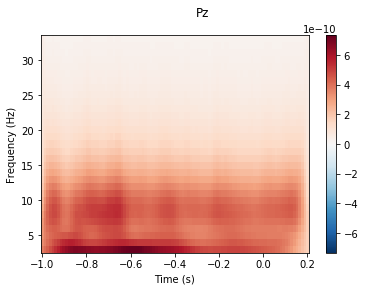

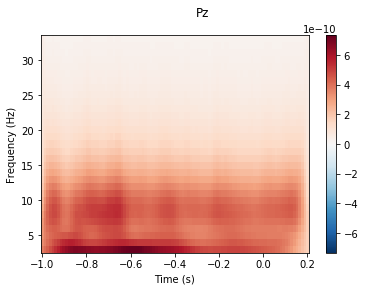

In [33]:
from mne.time_frequency import tfr_morlet
freqs = np.arange(3, 34, 1)
n_cycles = 2  # number of cycles in Morlet wavelet
power1, itc1 = tfr_morlet(BR_dominant, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)


In [38]:
from mne.time_frequency import tfr_morlet
freqs = np.arange(3, 34, 1)
n_cycles = 2  # number of cycles in Morlet wavelet
power2, itc2 = tfr_morlet(RPL_dominant, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)


In [186]:
BR_mixed_gfp = np.nanstd(all_BR_mixed_trials,axis=1)
BR_dominant_gfp = np.nanstd(all_BR_dominant_trials,axis=1)
RPL_mixed_gfp = np.nanstd(all_RPL_mixed_trials,axis=1)
RPL_dominant_gfp = np.nanstd(all_RPL_dominant_trials,axis=1)

In [187]:
[F,c,p,H0] = mne.stats.permutation_cluster_test([all_BR_dominant_trials,all_RPL_dominant_trials])

Using a threshold of 3.842297


<ipython-input-187-5acc895d2b49>:1: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  [F,c,p,H0] = mne.stats.permutation_cluster_test([all_BR_dominant_trials,all_RPL_dominant_trials])


stat_fun(H1): min=0.000000 max=19.090347
Running initial clustering
Found 96 clusters
Permuting 1023 times...
[............................................................] 100.00%  |
Computing cluster p-values
Done.


In [188]:
np.where(p<0.1)

(array([16]),)

In [65]:
np.where(c[16])

(array([11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
        17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21]),
 array([145, 146, 147, 148, 149, 146, 147, 143, 144, 145, 146, 147, 145,
        146, 147, 148, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 135, 136, 137, 138, 139, 140,
        141, 142, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 13

<IPython.core.display.Javascript object>


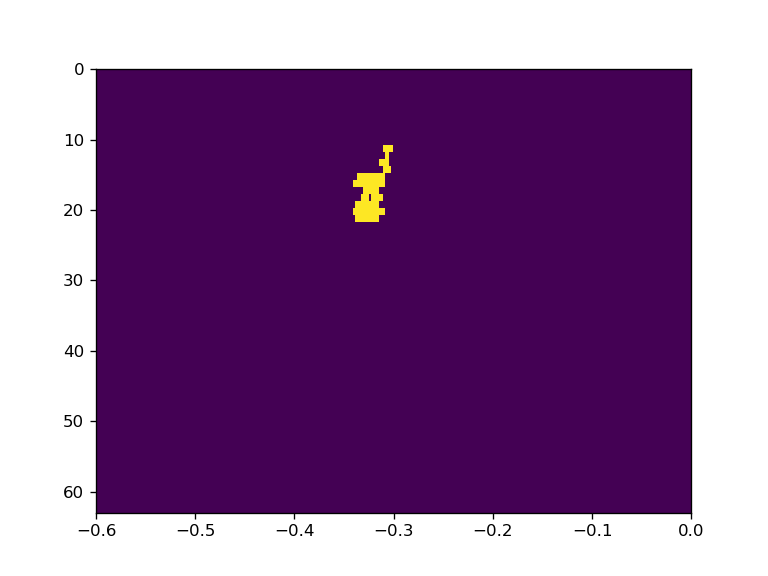

In [189]:
sig = np.zeros((64,len(times)))
for i in [16]:
    sig[np.where(c[i])]=1
plt.figure()
plt.imshow(sig,aspect='auto',extent=[-0.6,0,63,0])

In [34]:
np.unique(np.where(sig[:,110:160]))

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [35]:
np.unique(np.where(sig[:,:]))

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149])

<IPython.core.display.Javascript object>


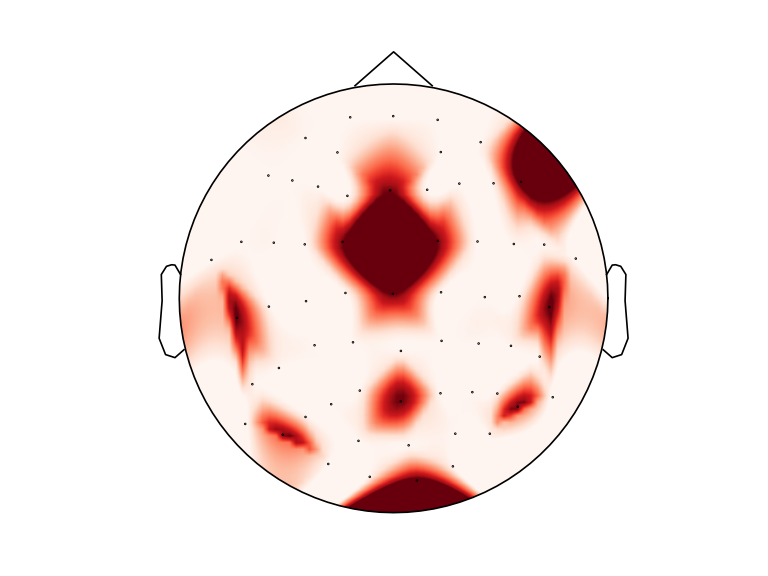

(<matplotlib.image.AxesImage at 0x7f166238d910>,
 <matplotlib.contour.QuadContourSet at 0x7f166238d810>)

In [190]:
topo1 = np.zeros((63,))
loc = np.unique(np.where(sig[:,110:180])[0])
# for i in range(len(loc)):
#     if(loc[i])>=31:
#         loc[i]-=1
topo1[loc] =1

# topo2 = np.zeros((63,))
# loc = np.unique(np.where(sig[:,110:180])[0])
# for i in range(len(loc)):
#     if(loc[i])>=31:
#         loc[i]-=1
# topo2[loc] =1

plt.figure()
mne.viz.plot_topomap(topo1,raw.info,contours=False)

# plt.figure()
# mne.viz.plot_topomap(topo2,raw.info,contours=False)

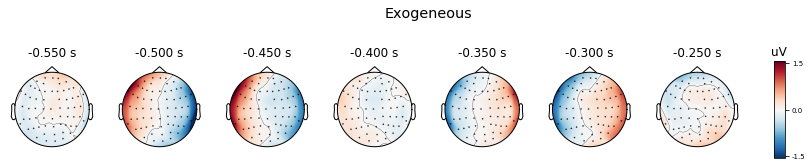

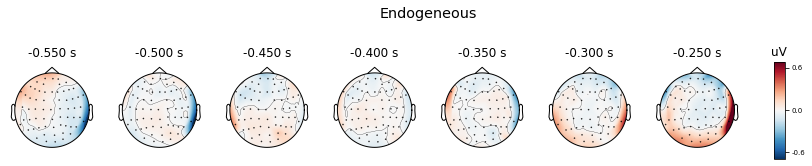

<Figure size 432x288 with 0 Axes>

In [117]:
RPL_av_dominant.plot_topomap(times=np.arange(-0.55,-0.25,0.05),average=0.1,title='Exogeneous',contours=True)
BR_av_dominant.plot_topomap(times=np.arange(-0.55,-0.25,0.05),average=0.1,title='Endogeneous',contours=True)

plt.tight_layout()

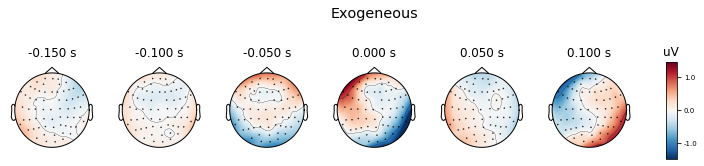

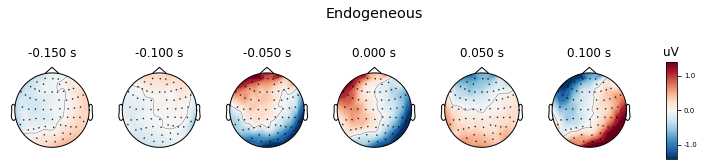

<Figure size 432x288 with 0 Axes>

In [122]:
RPL_av_dominant.plot_topomap(times=np.arange(-0.15,0.15,0.05),average=0.1,title='Exogeneous',contours=True)
BR_av_dominant.plot_topomap(times=np.arange(-0.15,0.15,0.05),average=0.1,title='Endogeneous',contours=True)

plt.tight_layout()

In [129]:
import math
mu1= np.nanmean(all_BR_dominant_trials,axis=0)
mu2 = np.nanmean(all_RPL_dominant_trials,axis=0)
mu1 =np.delete(mu1,31,axis=0)
mu2 =np.delete(mu2,31,axis=0)

err1 = np.nanstd(all_BR_dominant_trials,axis=0)/math.sqrt(all_BR_dominant_trials.shape[0])
err2 = np.nanstd(all_RPL_dominant_trials,axis=0)/math.sqrt(all_RPL_dominant_trials.shape[0])

In [251]:
RPL_dominant_sEvoked = RPL_dominant.average().crop(tmin=-0.6, tmax=0.1).copy()
BR_dominant_sEvoked = BR_dominant.average().crop(tmin=-0.6, tmax=0.1).copy()

In [156]:
peak1 = RPL_dominant_sEvoked.get_peak(ch_type='eeg',tmin=-0.4, tmax=-0.3)
peak2 = RPL_dominant_sEvoked.get_peak(ch_type='eeg',tmin=-0.1, tmax=-0.05)

In [158]:
peak1


('FT9', -0.344)

In [159]:
peak2

('FT10', -0.064)

<IPython.core.display.Javascript object>


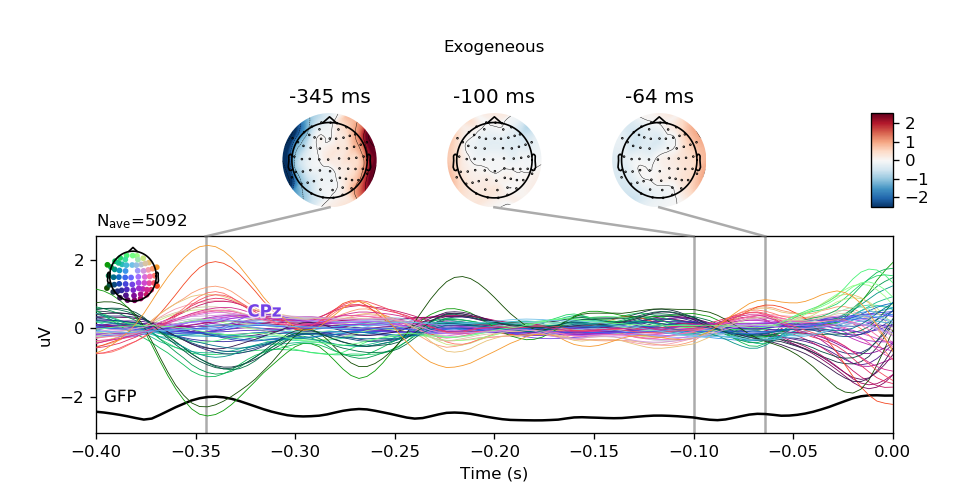

<IPython.core.display.Javascript object>


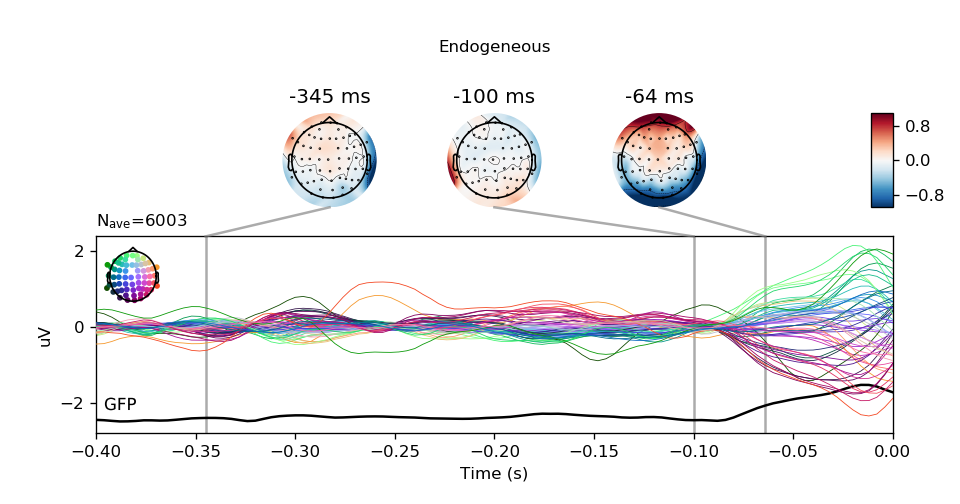

<IPython.core.display.Javascript object>


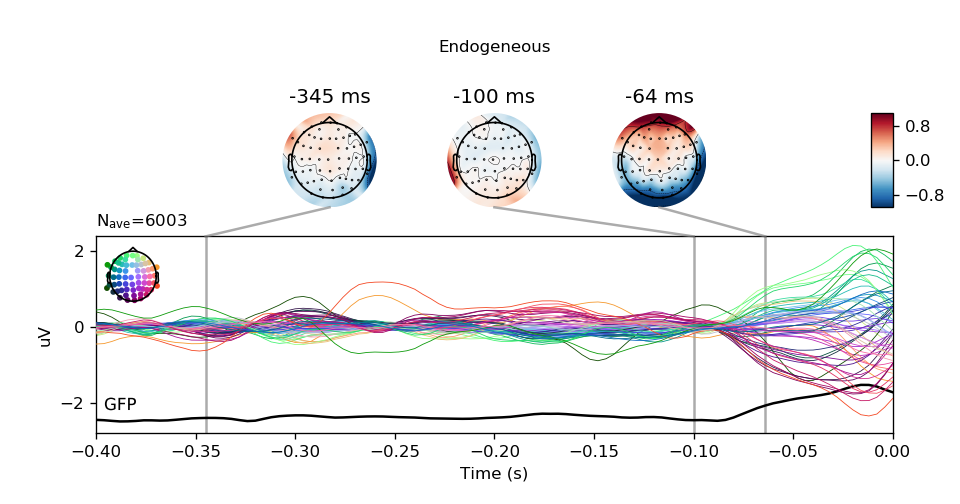

In [181]:
ts_args = dict(gfp=True, time_unit='s')
topomap_args = dict(sensors=True, time_unit='ms')
RPL_dominant_sEvoked.plot_joint(title='Exogeneous', times=[-0.345, -0.1, -0.064],
                        ts_args=ts_args, topomap_args=topomap_args)
BR_dominant_sEvoked.plot_joint(title='Endogeneous', times=[-0.345, -0.1, -0.064],
                        ts_args=ts_args, topomap_args=topomap_args)
#plt.tight_layout()

In [219]:
len(np.arange(-0.4,0.004,0.004))

101

In [239]:
ch = RPL_dominant_sEvoked.ch_names[11:21]

In [245]:
RPL_dominant_sEvoked_singleCH = RPL_dominant_sEvoked.copy().pick_channels(ch_names=[ch[0]])

In [249]:
RPL_dominant_sEvoked_singleCH.data[0]

array([-3.99269066e-07, -3.55094071e-07, -2.99941175e-07, -2.46482531e-07,
       -1.76766497e-07, -9.34501729e-08,  3.80353014e-08,  2.23374230e-07,
        4.17751013e-07,  5.79340276e-07,  7.19831809e-07,  8.26820193e-07,
        9.30949648e-07,  9.75372625e-07,  9.85189852e-07,  9.79088317e-07,
        9.28366437e-07,  8.48107542e-07,  7.37298369e-07,  6.27446993e-07,
        5.40509953e-07,  4.76467340e-07,  4.26001656e-07,  4.16947527e-07,
        3.71759335e-07,  3.27129537e-07,  2.70386330e-07,  2.34527325e-07,
        1.99784718e-07,  1.95916486e-07,  2.34067771e-07,  2.80648466e-07,
        3.39006369e-07,  4.03389904e-07,  4.37614152e-07,  4.13340050e-07,
        3.63794096e-07,  3.09280024e-07,  2.25978390e-07,  1.14325616e-07,
       -2.91674806e-08, -1.84975810e-07, -3.76539453e-07, -5.39017974e-07,
       -6.64568867e-07, -6.91549367e-07, -6.65831803e-07, -5.90368986e-07,
       -4.71111666e-07, -3.64237505e-07, -2.93150816e-07, -2.31889636e-07,
       -2.07589017e-07, -

F8


<IPython.core.display.Javascript object>


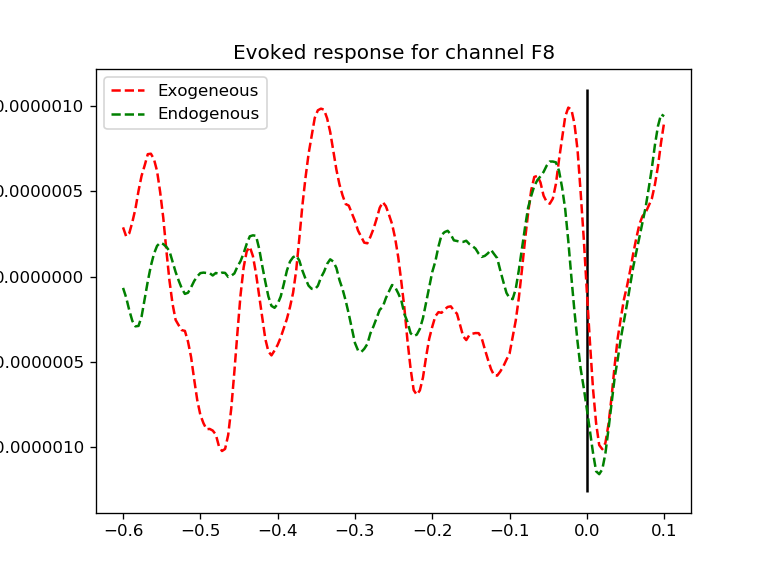

T7


<IPython.core.display.Javascript object>


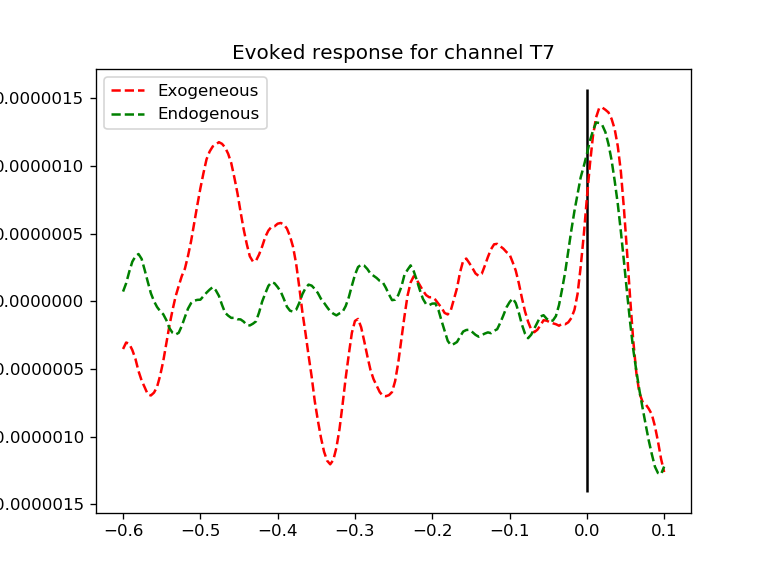

T8


<IPython.core.display.Javascript object>


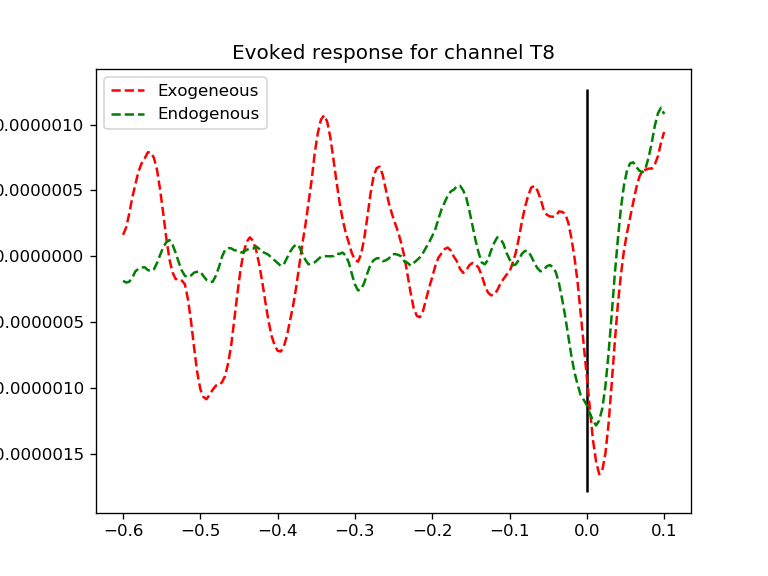

P7


<IPython.core.display.Javascript object>


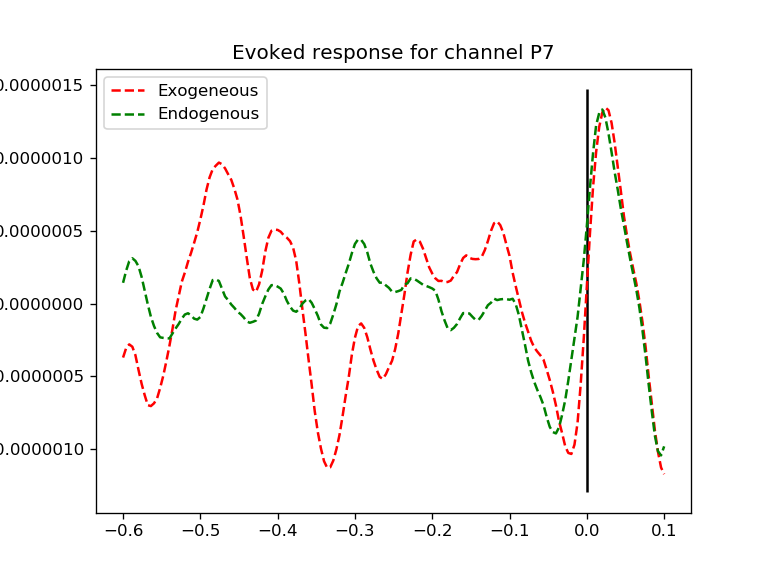

P8


<IPython.core.display.Javascript object>


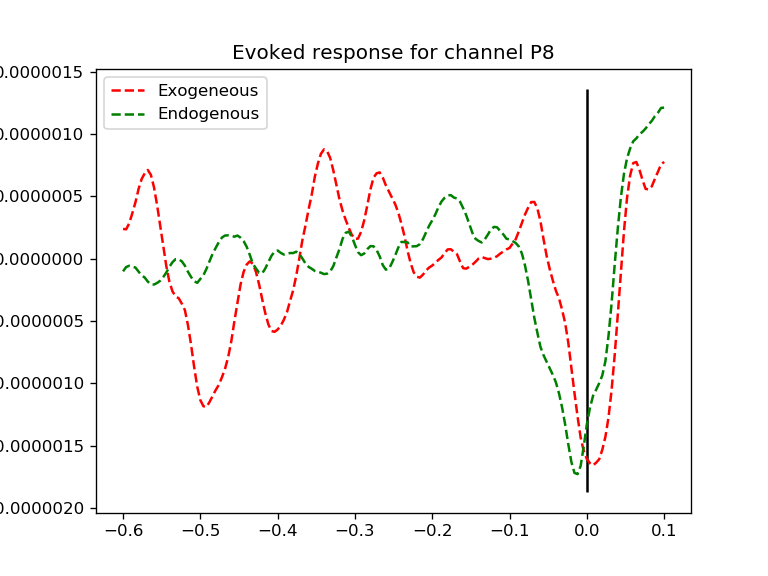

Fz


<IPython.core.display.Javascript object>


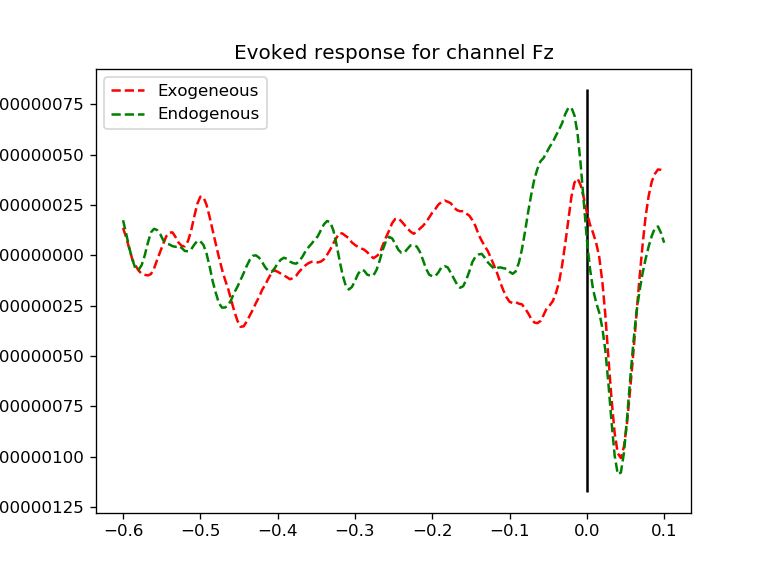

Cz


<IPython.core.display.Javascript object>


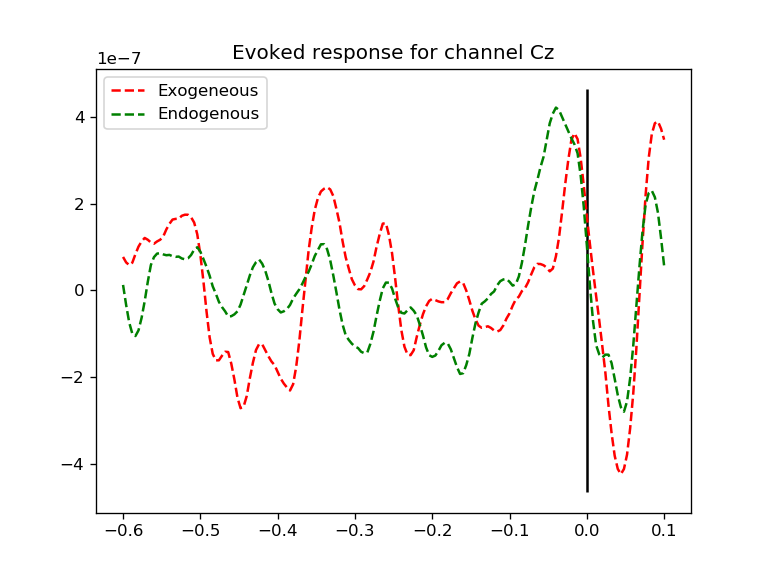

Pz


<IPython.core.display.Javascript object>


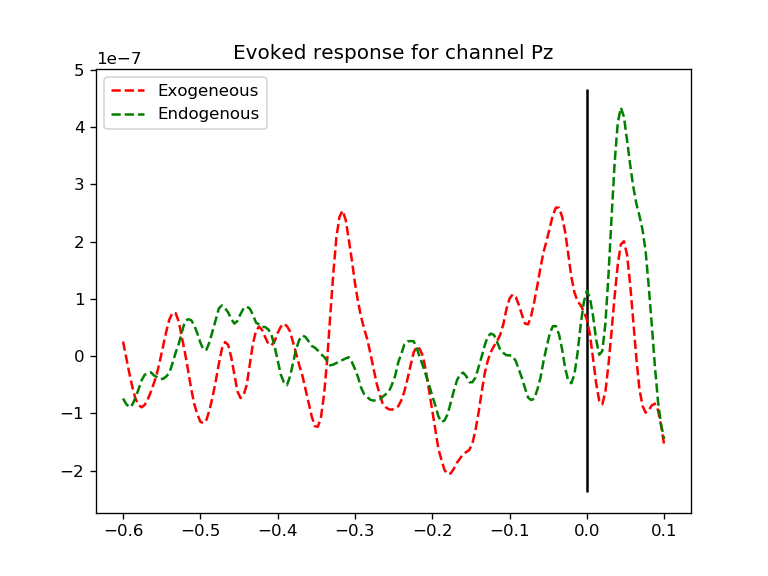

Oz


<IPython.core.display.Javascript object>


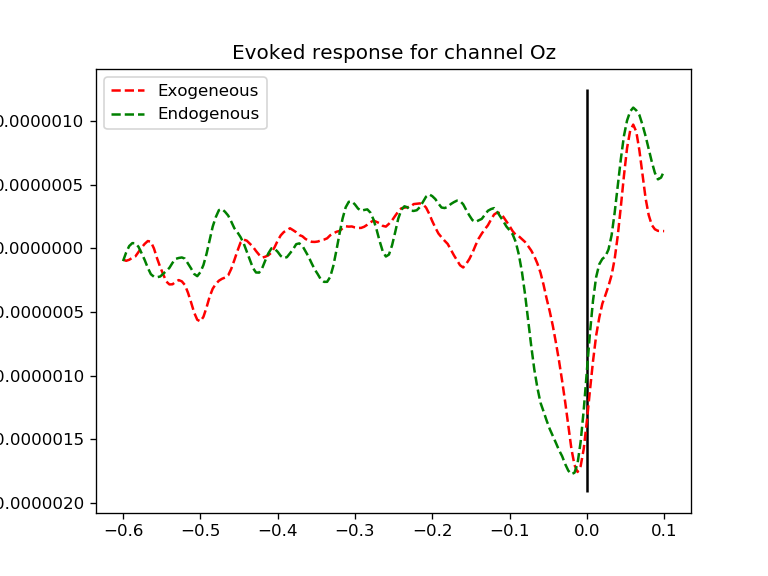

FC1


<IPython.core.display.Javascript object>


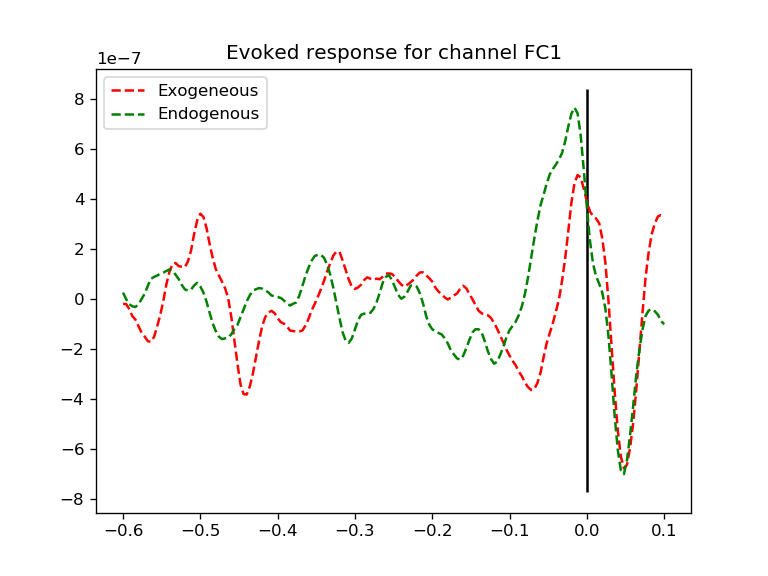

In [252]:
%matplotlib notebook
for c in ch:
    print(c)
    plt.figure()
    #plt.plot(times,np.std(RPL_av_mixed.data,axis=0),c='r')
    RPL_dominant_sEvoked_singleCH = RPL_dominant_sEvoked.copy().pick_channels(ch_names=[c])
    BR_dominant_sEvoked_singleCH = BR_dominant_sEvoked.copy().pick_channels(ch_names=[c])
    
    plt.plot(np.arange(-0.6,0.104,0.004),RPL_dominant_sEvoked_singleCH.data[0],c='r',linestyle='dashed')
    #plt.plot(times,np.std(BR_av_mixed.data,axis=0),c='g')
    plt.plot(np.arange(-0.6,0.104,0.004),BR_dominant_sEvoked_singleCH.data[0],c='g',linestyle='dashed')
    title='Evoked response for channel %s'
    plt.vlines(0,plt.ylim()[0],plt.ylim()[1])
    plt.legend(['Exogeneous','Endogenous'])
    plt.title(title % c)

In [77]:
diff = BR_av_dominant.data/np.std(BR_av_dominant.data,axis=0) - RPL_av_dominant.data /np.std(RPL_av_dominant.data,axis=0)

In [60]:
diff.mean()

0.0348344866110637

<IPython.core.display.Javascript object>


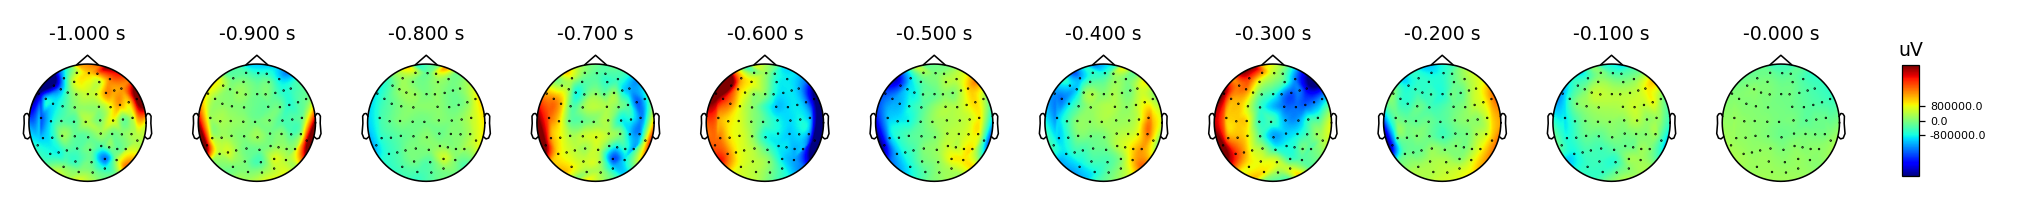

<IPython.core.display.Javascript object>


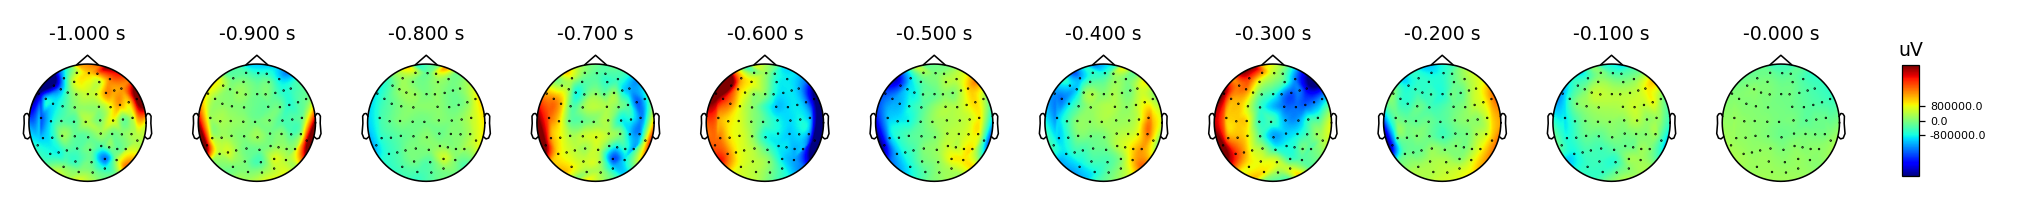

In [80]:
diff_evoked = mne.EvokedArray(diff,info=RPL_av_dominant.info,tmin=-1)
diff_evoked.plot_topomap(times=np.arange(-1,0.1,0.1),contours=False,cmap='jet',vmin=-3e6,vmax=3e6)


In [70]:
RPL_av_dominant.data.min()

-1.828989780474766e-05

<IPython.core.display.Javascript object>


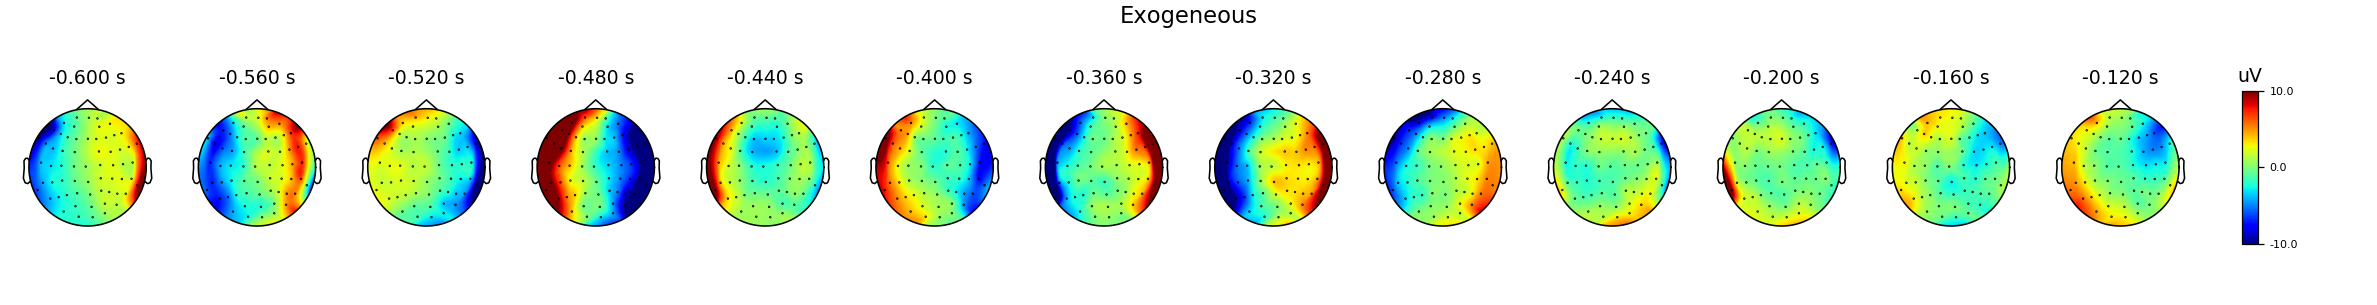

<IPython.core.display.Javascript object>


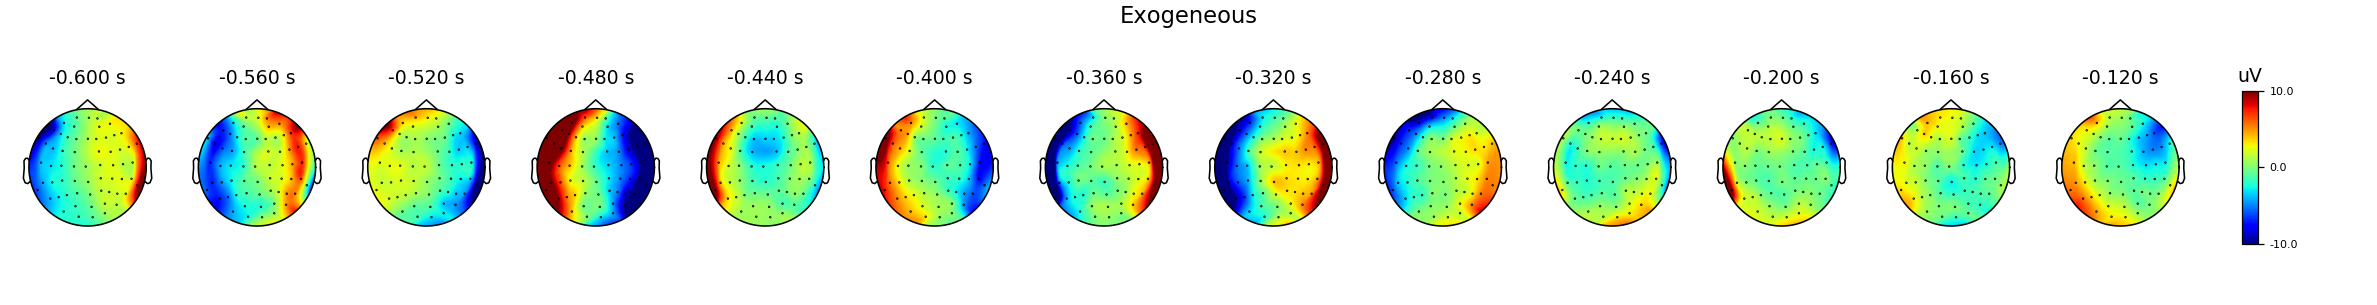

In [82]:
RPL_av_dominant.plot_topomap(times=np.arange(-0.6,-0.1,0.04),contours=False,cmap='jet',title='Exogeneous',scalings=1e7,vmin=-10,vmax=10)
#BR_av_dominant.plot_topomap(times=np.arange(-1,-0.1,0.1),contours=False,cmap='jet',title='Endogeneous',scalings=1e7,vmin=-5,vmax=5)